In [ ]:
import pandas as pd
df=pd.read_csv("/content/top-5000-youtube-channels.csv")
df.head(3248)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
3243,"3,244th",B+,HollywoodLife,6977,2196875,1367225615
3244,"3,245th",B+,maidigitv,25708,553656,1033050461
3245,"3,246th",B+,ATHLEAN-X™,944,6105099,868911508
3246,"3,247th",B+,ZoeVEVO,106,1556371,1502898899


In [ ]:
df[df["Video views"]==df["Video views"].max()][["Channel name","Video views"]]

,Channel name,Video views
1,T-Series,47548839843


In [ ]:
df.iat[2701, 4]

'-- '

In [ ]:
df["Subscribers"].sort_values()

,Subscribers
2701,--
391,--
3590,--
1851,--
2348,--
...,...
1336,997671
4898,99785
306,9987454
75,9994112


<Axes: >

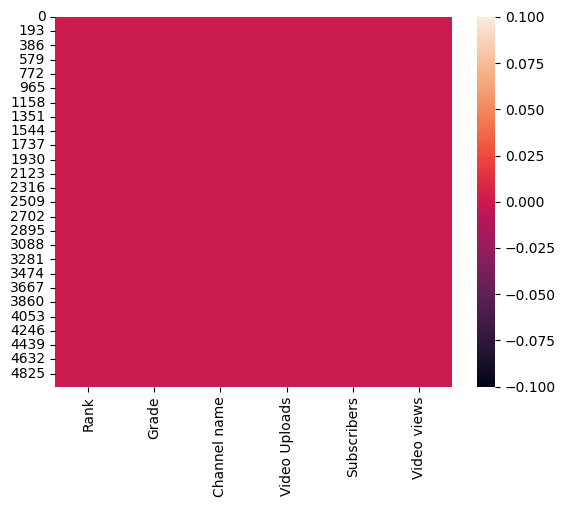

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

,0
Rank,0
Grade,0
Channel name,0
Video Uploads,0
Subscribers,0
Video views,0


In [ ]:
df["Rank"].spilt(3)

AttributeError: 'Series' object has no attribute 'spilt'

Exponential to float

In [ ]:
pd.options.display.float_format='{:.2f}'.format

In [ ]:
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [ ]:

import numpy as np
df=df.replace ('-- ',np.nan,regex=True)

In [ ]:
df.iat[2701, 4]

nan

clean rank col

In [ ]:
#remove str, comma, change into int
df["Rank"]=df["Rank"].str[0:-2]

In [ ]:
df["Rank"]=df["Rank"].str.replace(',', '').astype('int')

In [ ]:
df["Rank"]

,Rank
0,1
1,2
2,3
3,4
4,5
...,...
4995,4996
4996,4997
4997,4998
4998,4999


Clean video upload and subscribe col

In [ ]:
df.dtypes

,0
Rank,int64
Grade,object
Channel name,object
Video Uploads,object
Subscribers,object
Video views,int64


In [ ]:
#convert both into into
df["Video Uploads"]=df["Video Uploads"].astype('int')

ValueError: invalid literal for int() with base 10: '--'

In [ ]:
df["Video Uploads"]=df["Video Uploads"].str.replace("--","0")

In [ ]:
df["Video Uploads"]=df["Video Uploads"].astype('int')

In [ ]:
df.dtypes

,0
Rank,int64
Grade,object
Channel name,object
Video Uploads,int64
Subscribers,object
Video views,int64


In [ ]:
df["Subscribers"]=df["Subscribers"].astype('int')

ValueError: cannot convert float NaN to integer

In [ ]:
df["Subscribers"]=df["Subscribers"].fillna(0).astype('int')

In [ ]:
df. dtypes

,0
Rank,int64
Grade,object
Channel name,object
Video Uploads,int64
Subscribers,int64
Video views,int64


Grade col

In [ ]:
df["Grade"].unique()

array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [ ]:
df["Grade"]=df["Grade"].map({'A++ ':5, 'A+ ':4, 'A ':3,'A- ':2, 'B+ ':1})

In [ ]:
df["Grade"]

,Grade
0,5.00
1,5.00
2,5.00
3,5.00
4,5.00
...,...
4995,1.00
4996,1.00
4997,1.00
4998,1.00


Avg view of each channel

In [ ]:
#Own
df.groupby("Channel name")["Subscribers"].mean().sort_values(ascending=False)

,Subscribers
Channel name,
PewDiePie,65995310.00
T-Series,61196302.00
Canal KondZilla,39409726.00
Dude Perfect,34489432.00
HolaSoyGerman.,34480357.00
...,...
Digital Gyan,0.00
Kids Entertainment,0.00
Красныш,0.00


In [ ]:
df["avg"]=df["Video views"]/df["Video Uploads"]

In [ ]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg
0,1,5.00,Zee TV,82757,18752951,20869786591,252181.53
1,2,5.00,T-Series,12661,61196302,47548839843,3755535.89
2,3,5.00,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5.00,SET India,27323,31180559,22675948293,829921.62
4,5,5.00,WWE,36756,32852346,26273668433,714813.05


In [ ]:
df["avg"].tail()

,avg
4995,624933.14
4996,473440.05
4997,2834167.51
4998,4191.01
4999,288631.93


In [ ]:
df["avg"].sort_values(ascending=False)

,avg
3247,inf
517,inf
4898,inf
267,inf
3072,inf
...,...
4583,138.46
2404,75.00
3216,63.99
812,53.55


In [ ]:
df.iat[3247, -1]

inf

In [ ]:
df.head(3248)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg
0,1,5.00,Zee TV,82757,18752951,20869786591,252181.53
1,2,5.00,T-Series,12661,61196302,47548839843,3755535.89
2,3,5.00,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5.00,SET India,27323,31180559,22675948293,829921.62
4,5,5.00,WWE,36756,32852346,26273668433,714813.05
...,...,...,...,...,...,...,...
3243,3244,1.00,HollywoodLife,6977,2196875,1367225615,195961.82
3244,3245,1.00,maidigitv,25708,553656,1033050461,40184.01
3245,3246,1.00,ATHLEAN-X™,944,6105099,868911508,920457.11
3246,3247,1.00,ZoeVEVO,106,1556371,1502898899,14178291.50


In [ ]:
import pandas as pd
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df["avg"].sort_values(ascending=False)

,avg
628,333012122.00
314,302535759.88
613,239164879.45
389,237500443.18
1120,211312892.12
...,...
517,NaN
2323,NaN
3072,NaN
3247,NaN


In [ ]:
df.dtypes

,0
Rank,int64
Grade,float64
Channel name,object
Video Uploads,int64
Subscribers,int64
Video views,int64
avg,float64


Top 5 ch max of video upload

In [ ]:
df.groupby("Channel name")["Video Uploads"].sort_values(ascending=False)

In [ ]:
df.sort_values(by="Video Uploads",ascending=False)

Which grade has a max no video upload

<Axes: xlabel='Grade', ylabel='Video Uploads'>

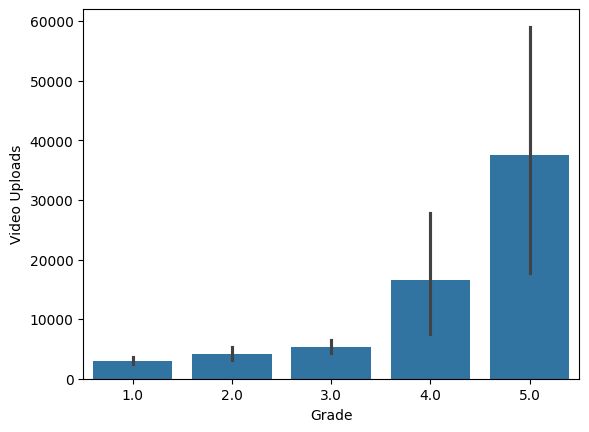

In [153]:
sns.barplot(x="Grade",y="Video Uploads",data=df)

<Axes: xlabel='Grade', ylabel='avg'>

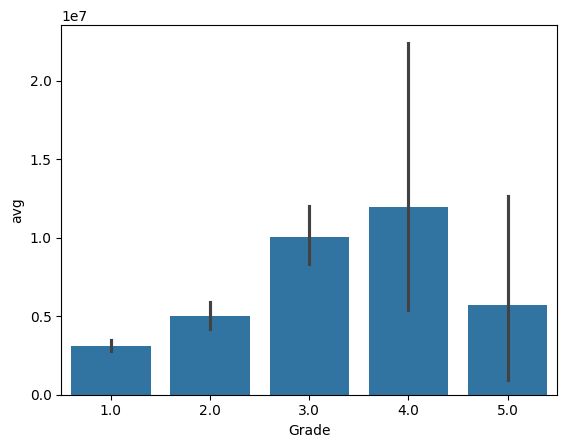

In [155]:
sns.barplot(x="Grade",y="avg",data=df)